In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, classification_report, r2_score

In [318]:
data = pd.read_csv("cirrhosis.csv")
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [320]:
data.dropna(inplace=True)

In [321]:
data.isna().sum().sum()

0

In [322]:
data.drop(['ID'], axis=1, inplace=True)
data['Age'] = (data['Age'].values / 365.25).round()
# data['Age'] = data['Age'].astype(int)
# data['Stage']= data['Stage'].astype(int)
# data['Ascites']=

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    object 
 2   Drug           276 non-null    object 
 3   Age            276 non-null    float64
 4   Sex            276 non-null    object 
 5   Ascites        276 non-null    object 
 6   Hepatomegaly   276 non-null    object 
 7   Spiders        276 non-null    object 
 8   Edema          276 non-null    object 
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage          

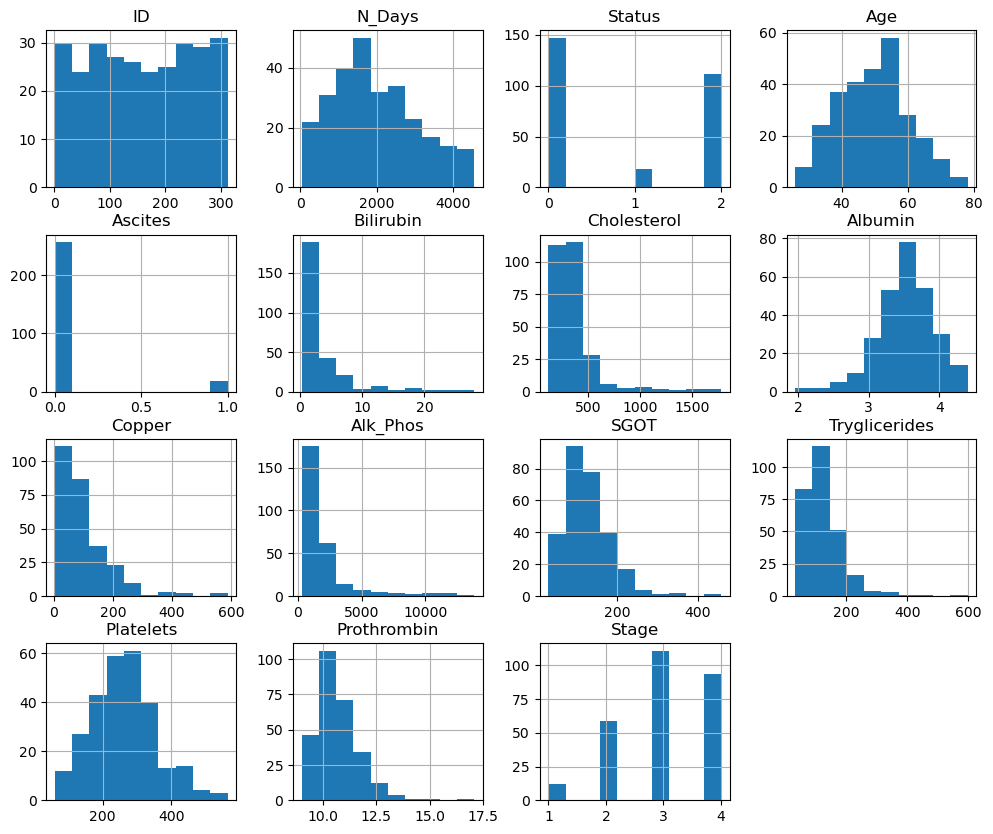

In [9]:
data.hist(figsize=(12,10))
plt.show()

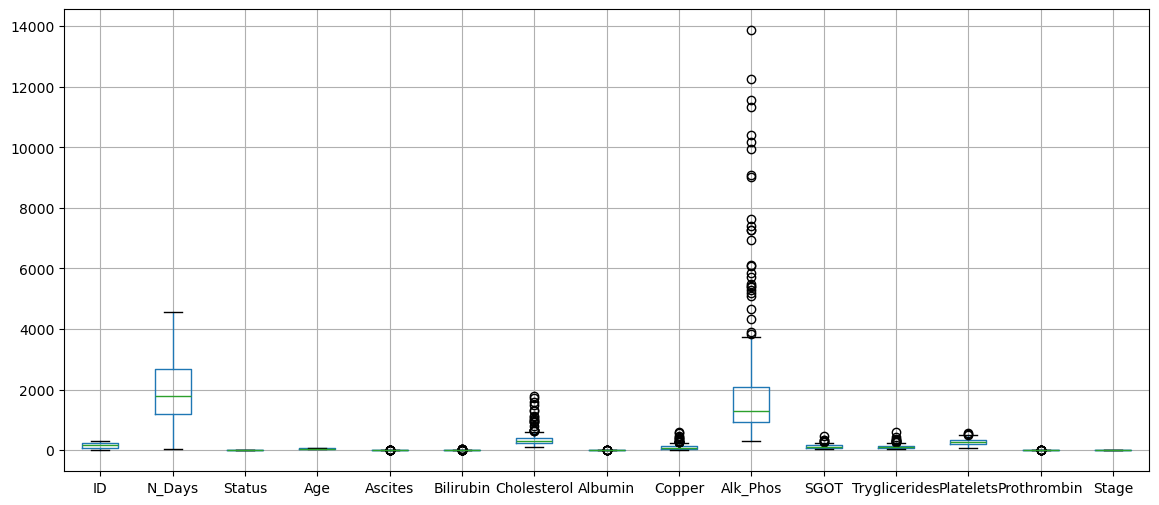

In [10]:
data.boxplot(figsize=(14, 6))
plt.show()

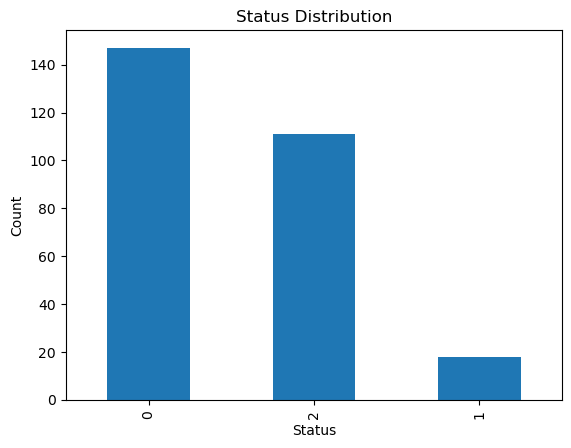

In [11]:
data['Status'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

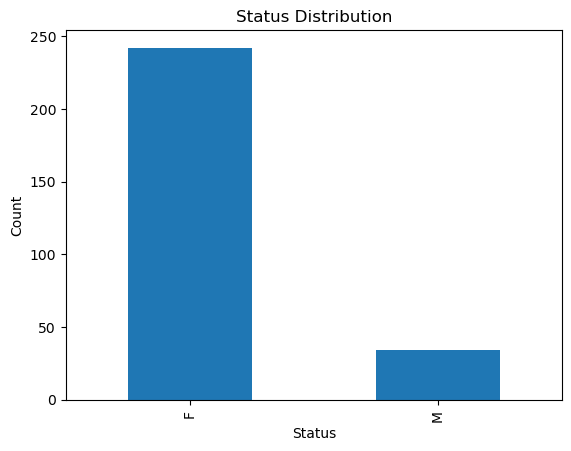

In [12]:
data['Sex'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

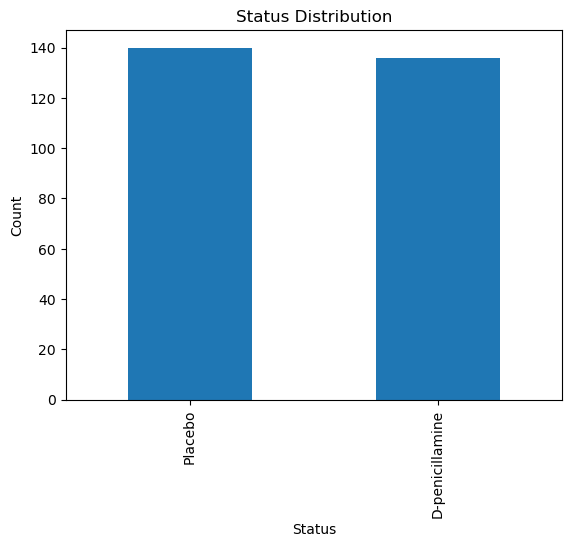

In [13]:
data['Drug'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

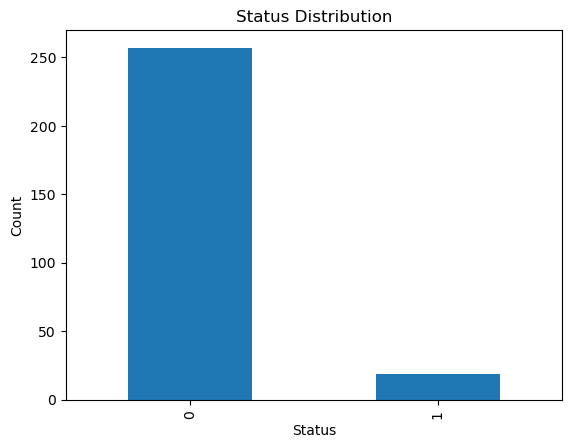

In [14]:
data['Ascites'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

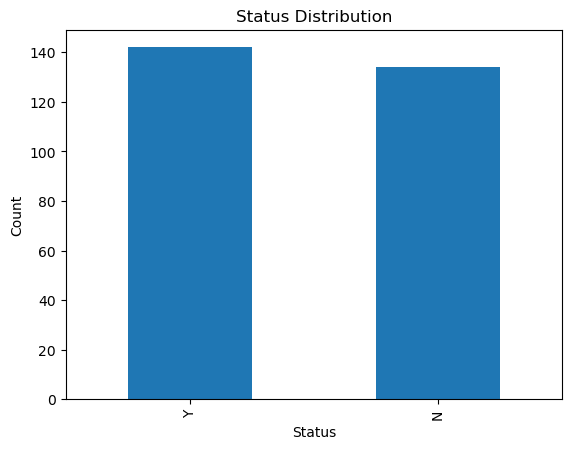

In [15]:
data['Hepatomegaly'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

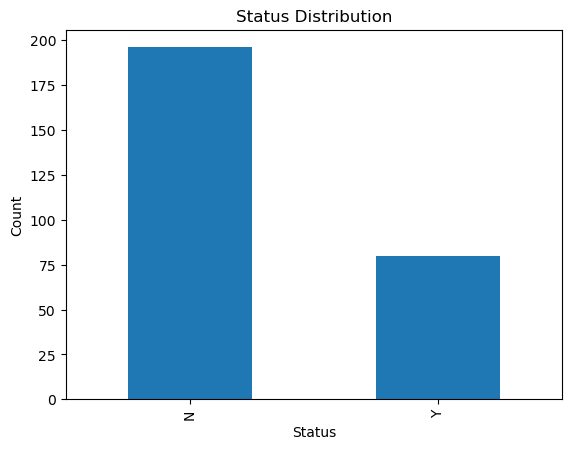

In [16]:
data['Spiders'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

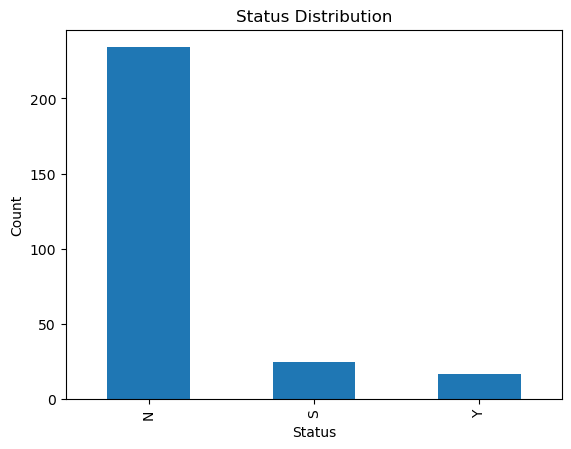

In [17]:
data['Edema'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [18]:
string_columns = data.select_dtypes(include=['object']).columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('ID')

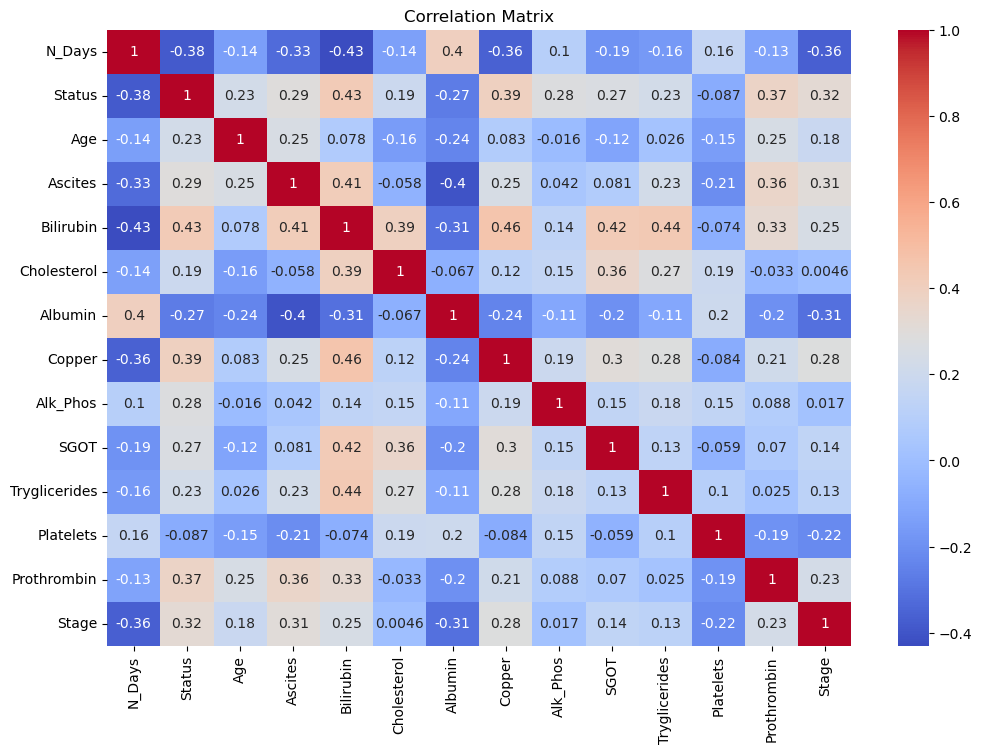

In [19]:
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

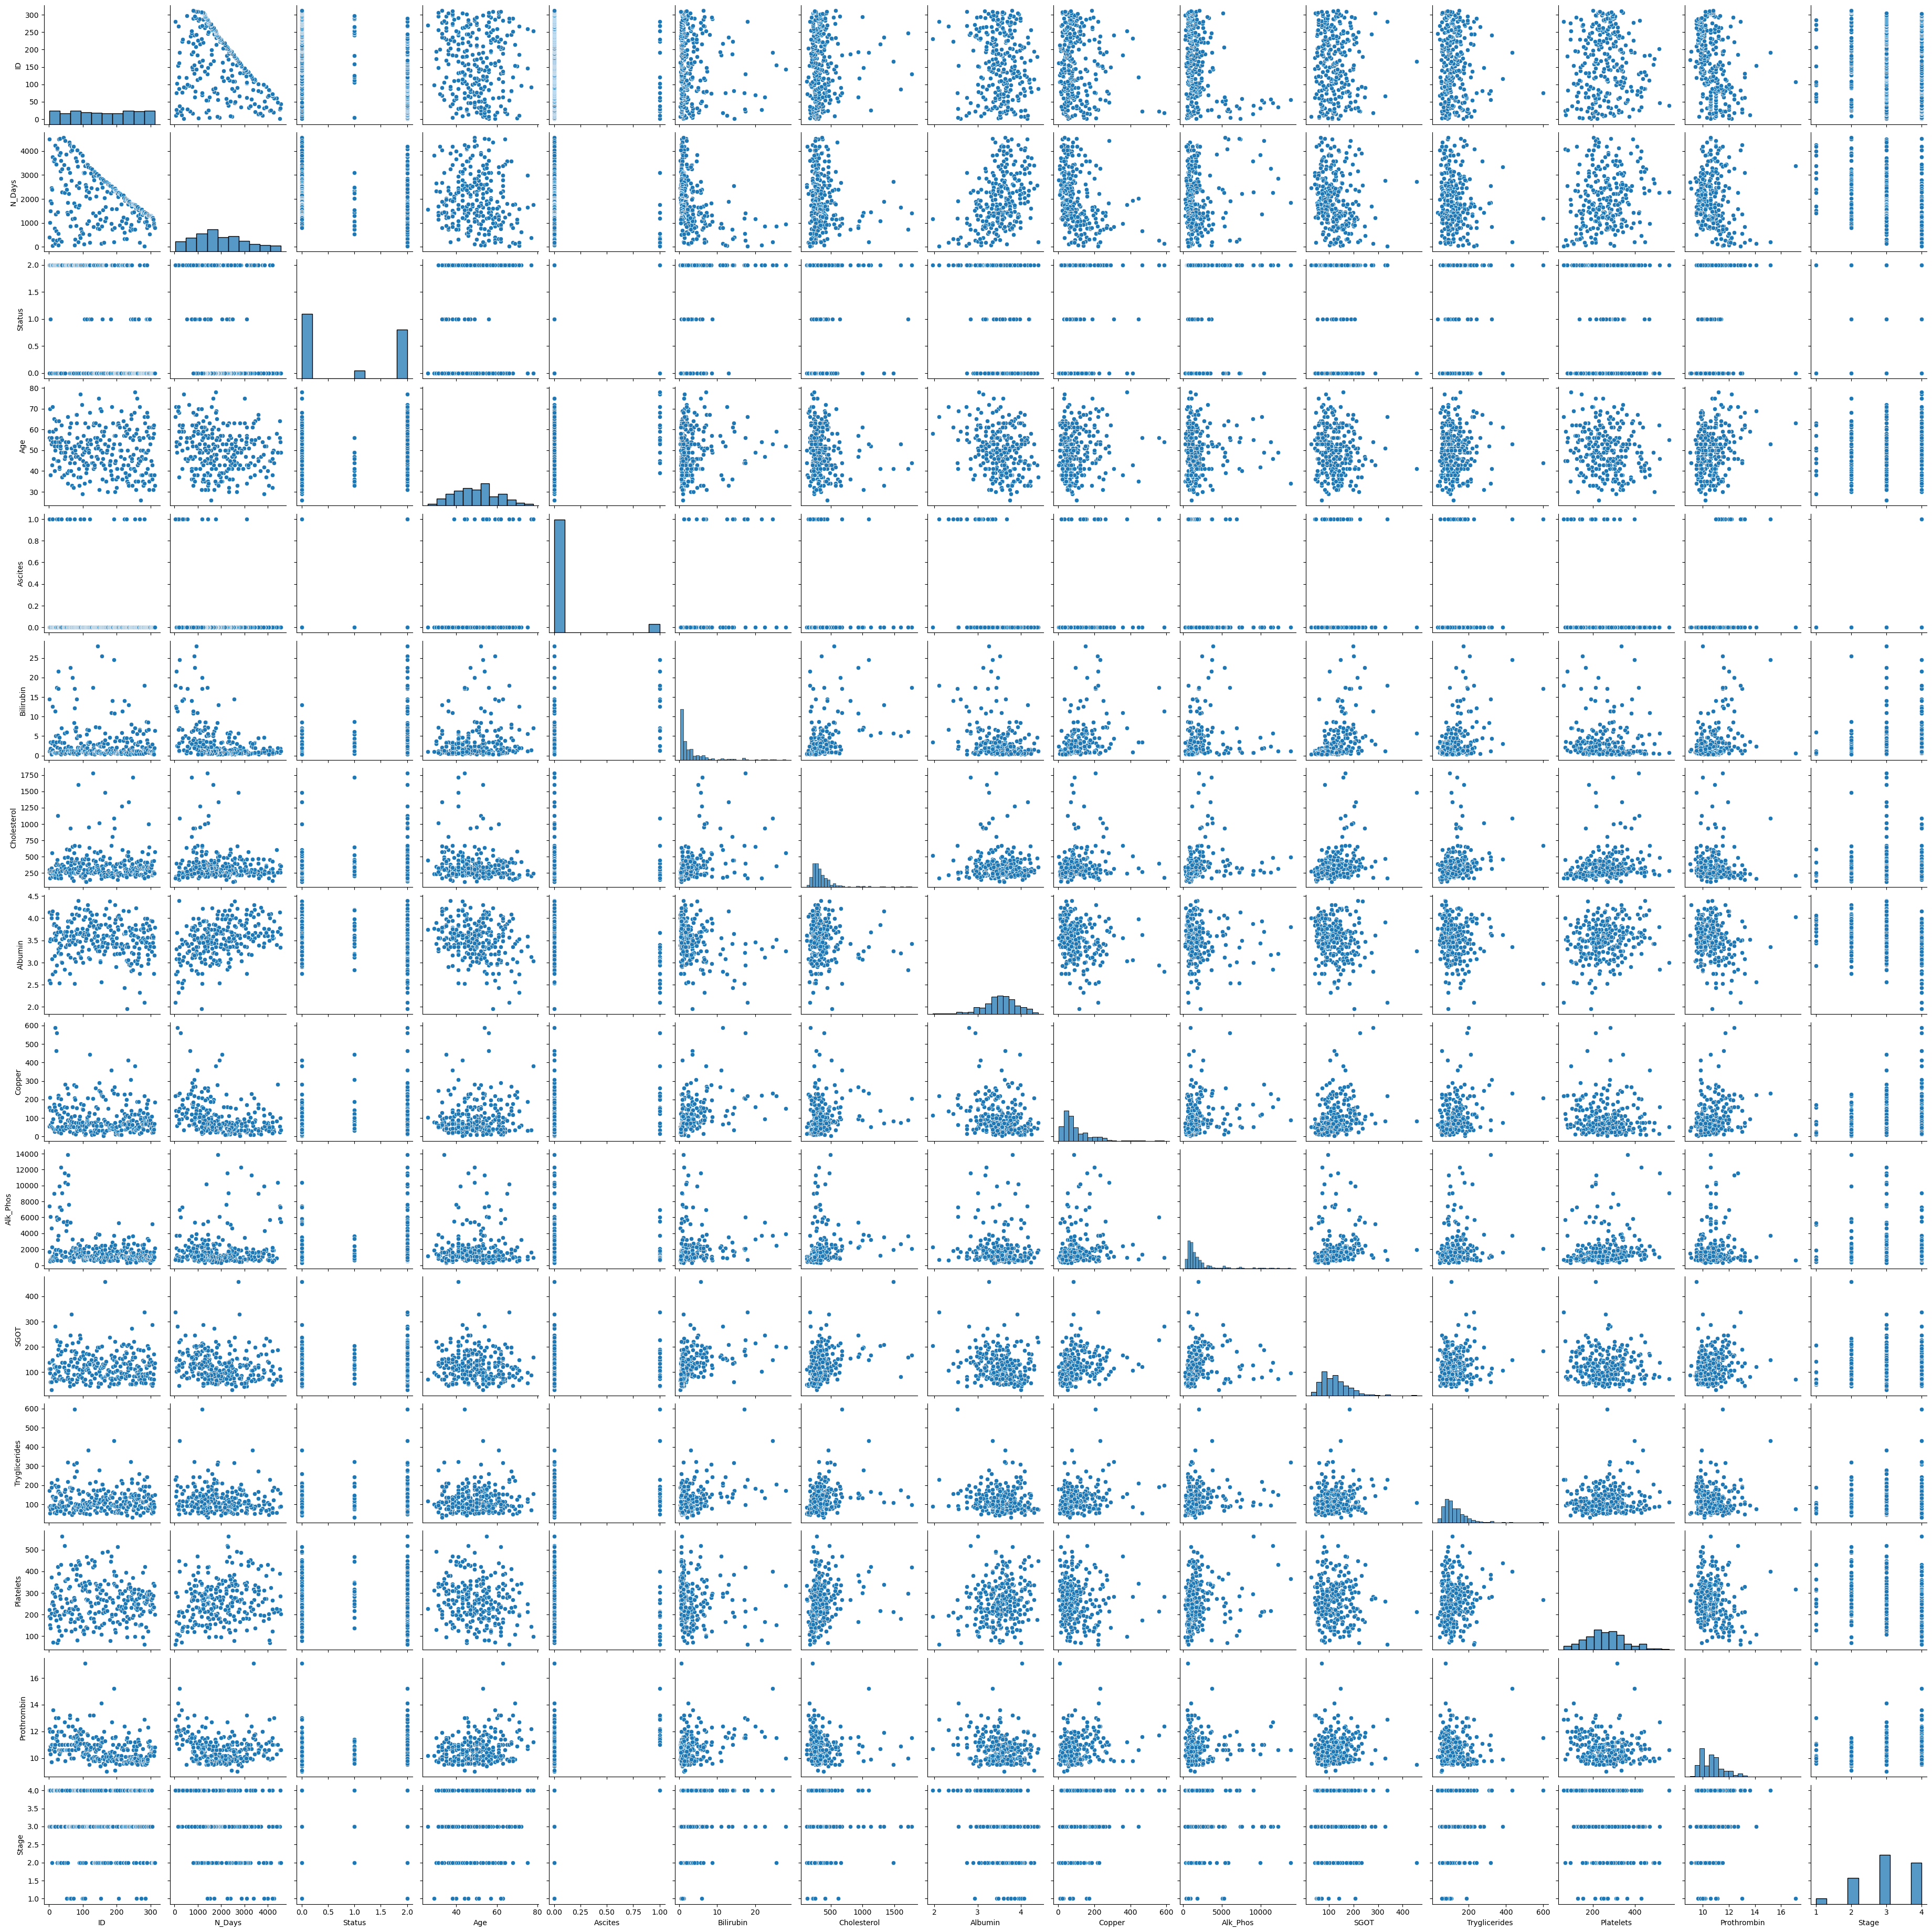

In [20]:
sns.pairplot(data)
plt.show()

In [260]:
stage1_lifetime = data['N_Days'][data['Stage'] == 1]
stage2_lifetime = data['N_Days'][data['Stage'] == 2]
stage3_lifetime = data['N_Days'][data['Stage'] == 3]
stage4_lifetime = data['N_Days'][data['Stage'] == 4]

f_statistics, p_anova = stats.f_oneway(stage1_lifetime, stage2_lifetime, stage3_lifetime, stage4_lifetime)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:14.652726770436171
p-value:7.13452989472007e-09


In [261]:
placebo = data['N_Days'][data['Drug'] == 'Placebo']
drug = data['N_Days'][data['Drug'] == 'D-penicillamine']

t_stat, p_value = stats.ttest_ind(placebo, drug)

print(f"t-statistics:{t_stat}\np-value:{p_value}")

t-statistics:0.32003247333319806
p-value:0.7491876157470855


In [262]:
stage1_bil = data['Bilirubin'][data['Stage'] == 1]
stage2_bil = data['Bilirubin'][data['Stage'] == 2]
stage3_bil = data['Bilirubin'][data['Stage'] == 3]
stage4_bil = data['Bilirubin'][data['Stage'] == 4]

f_statistics, p_anova = stats.f_oneway(stage1_bil, stage2_bil, stage3_bil, stage4_bil)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:6.198099356568089
p-value:0.00043587394597718583


In [263]:
stage1_copper = data['Copper'][data['Stage'] == 1]
stage2_copper = data['Copper'][data['Stage'] == 2]
stage3_copper = data['Copper'][data['Stage'] == 3]
stage4_copper = data['Copper'][data['Stage'] == 4]


f_statistics, p_anova = stats.f_oneway(stage1_copper, stage2_copper, stage3_copper, stage4_copper)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:8.285901251160448
p-value:2.710722176107707e-05


In [303]:
placebo_ascites = data['Ascites'].replace(['N','Y'], [0, 1])[data['Drug'] == 'Placebo']
drug_ascites = data['Ascites'].replace(['N','Y'], [0, 1])[data['Drug'] == 'D-penicillamine']

t_stat, p_value = stats.ttest_ind(placebo_ascites, drug_ascites)

print(f"t-statistics:{t_stat}\np-value:{p_value}")

t-statistics:-0.77680959621372
p-value:0.4379412068837919


In [265]:
placebo_copper = data['Copper'][data['Drug'] == 'Placebo']
drug_copper = data['Copper'][data['Drug'] == 'D-penicillamine']

t_stat, p_value = stats.ttest_ind(placebo_copper, drug_copper)

print(f"t-statistics:{t_stat}\np-value:{p_value}")

t-statistics:-0.4774595149849422
p-value:0.6334155786019632


In [266]:
stage1_alb = data['Albumin'][data['Stage'] == 1]
stage2_alb = data['Albumin'][data['Stage'] == 2]
stage3_alb = data['Albumin'][data['Stage'] == 3]
stage4_alb = data['Albumin'][data['Stage'] == 4]


f_statistics, p_anova = stats.f_oneway(stage1_alb, stage2_alb, stage3_alb, stage4_alb)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:14.45527577453224
p-value:9.157747549816485e-09


In [267]:
stage1_plt = data['Platelets'][data['Stage'] == 1]
stage2_plt = data['Platelets'][data['Stage'] == 2]
stage3_plt = data['Platelets'][data['Stage'] == 3]
stage4_plt = data['Platelets'][data['Stage'] == 4]


f_statistics, p_anova = stats.f_oneway(stage1_plt, stage2_plt, stage3_plt, stage4_plt)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:6.423043084852575
p-value:0.0003227670738447904


In [268]:
tab = pd.crosstab(data['Prothrombin'], data['Status'])
chi2, pval, dof, expected = chi2_contingency(tab)
print(tab)
print("P-value:", pval)

Status        C  CL   D
Prothrombin            
9.0           1   0   0
9.1           1   0   0
9.4           1   0   0
9.5           6   0   1
9.6          10   1   1
9.7           6   0   1
9.8          13   1   3
9.9           9   1   6
10.0         10   4   4
10.1          9   2   3
10.2          8   0   2
10.3          4   2   4
10.4          4   0   1
10.5          6   0   2
10.6         15   1   9
10.7          5   1   3
10.8          7   0   1
10.9          5   1   3
11.0          6   0  15
11.1          2   0   4
11.2          5   2   2
11.3          1   1   1
11.4          2   1   3
11.5          3   0   6
11.6          2   0   3
11.7          0   0   4
11.8          0   0   2
11.9          1   0   1
12.0          1   0   7
12.1          0   0   2
12.2          0   0   2
12.3          1   0   0
12.4          0   0   4
12.7          0   0   2
12.9          1   0   1
13.0          1   0   2
13.2          0   0   3
13.6          0   0   1
14.1          0   0   1
15.2          0 

In [302]:
status0 = data['Prothrombin'][data['Status'] == 'C']
status1 = data['Prothrombin'][data['Status'] == 'CL']
status2 = data['Prothrombin'][data['Status'] == 'D']


f_statistics, p_anova = stats.f_oneway(status0, status1, status2)

print(f"F-statistics:{f_statistics}\np-value:{p_anova}")

F-statistics:23.98617433832181
p-value:2.53146059116385e-10


In [270]:
tab = pd.crosstab(data['Spiders'], data['Status'])
chi2, pval, dof, expected = chi2_contingency(tab)
print(tab)
print("P-value:", pval)

Status     C  CL   D
Spiders             
N        118  13  65
Y         29   5  46
P-value: 0.0007102304498808908


In [271]:
tab = pd.crosstab(data["Drug"], data["Status"])
chi2, pval, dof, expected = chi2_contingency(tab)
print(tab)
print("P-value:", pval)

Status            C  CL   D
Drug                       
D-penicillamine  70   9  57
Placebo          77   9  54
P-value: 0.8367255650781085


In [323]:
data_copy = data.copy()

In [324]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car
        
cat_cols, cat_but_car, num_cols = grab_col_names(data_copy)

Observation: 276
Variables: 19
cat_cols: 8
num_cols: 11
cat_but_car: 0
num_but_cat: 1


In [325]:
cat_cols = [col for col in cat_cols if col not in ["Stage"]]
cat_cols

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [326]:
def label_encoder(dataframe, binary_col, drop_first=True):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [327]:
binary_col =  [column for column in data_copy.columns if data_copy[column].dtype not in [int, float] and data[col].nunique() == 2]
for col in binary_col:
    label_encoder(data_copy, col)

In [328]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(data_copy, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [329]:
data_copy = one_hot_encoder(data_copy, cat_cols, drop_first=True)

In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         276 non-null    int64  
 1   Status         276 non-null    object 
 2   Drug           276 non-null    object 
 3   Age            276 non-null    float64
 4   Sex            276 non-null    object 
 5   Ascites        276 non-null    object 
 6   Hepatomegaly   276 non-null    object 
 7   Spiders        276 non-null    object 
 8   Edema          276 non-null    object 
 9   Bilirubin      276 non-null    float64
 10  Cholesterol    276 non-null    float64
 11  Albumin        276 non-null    float64
 12  Copper         276 non-null    float64
 13  Alk_Phos       276 non-null    float64
 14  SGOT           276 non-null    float64
 15  Tryglicerides  276 non-null    float64
 16  Platelets      276 non-null    float64
 17  Prothrombin    276 non-null    float64
 18  Stage          

In [331]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 311
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   N_Days          276 non-null    int64  
 1   Age             276 non-null    float64
 2   Bilirubin       276 non-null    float64
 3   Cholesterol     276 non-null    float64
 4   Albumin         276 non-null    float64
 5   Copper          276 non-null    float64
 6   Alk_Phos        276 non-null    float64
 7   SGOT            276 non-null    float64
 8   Tryglicerides   276 non-null    float64
 9   Platelets       276 non-null    float64
 10  Prothrombin     276 non-null    float64
 11  Stage           276 non-null    float64
 12  Status_CL       276 non-null    bool   
 13  Status_D        276 non-null    bool   
 14  Drug_Placebo    276 non-null    bool   
 15  Sex_M           276 non-null    bool   
 16  Ascites_Y       276 non-null    bool   
 17  Hepatomegaly_Y  276 non-null    bool   


In [332]:
data_copy.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,400,59.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,...,4.0,False,True,False,False,True,True,True,False,True
1,4500,56.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,...,3.0,False,False,False,False,False,True,True,False,False
2,1012,70.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,...,4.0,False,True,False,True,False,False,False,True,False
3,1925,55.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,...,4.0,False,True,False,False,False,True,True,True,False
4,1504,38.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,...,3.0,True,False,True,False,False,True,True,False,False


In [351]:
data_stage = data_copy.copy()
y = data_stage["Stage"].astype(int)
X = data_stage.drop(["Stage"], axis=1)

In [352]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 17)

In [363]:
lin_reg = LinearRegression()
d_tree = DecisionTreeClassifier()
ran_forest = RandomForestClassifier()
log_reg = LogisticRegression()

In [369]:
#Linear Regression model
model = lin_reg.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)
print(r2_score(y_test, y_predict))

0.17974850406048248


In [373]:
#Decision tree model
model = d_tree.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.30357142857142855
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.31      0.29      0.30        14
           3       0.33      0.24      0.28        25
           4       0.39      0.47      0.42        15

    accuracy                           0.30        56
   macro avg       0.26      0.25      0.25        56
weighted avg       0.33      0.30      0.31        56


In [372]:
#RF model
model = ran_forest.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.4107142857142857
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.20      0.21      0.21        14
           3       0.43      0.40      0.42        25
           4       0.59      0.67      0.62        15

    accuracy                           0.41        56
   macro avg       0.31      0.32      0.31        56
weighted avg       0.40      0.41      0.41        56


In [376]:
model = log_reg.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_train_predict = model.predict(x_train)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.30      0.21      0.25        14
           3       0.45      0.52      0.48        25
           4       0.40      0.40      0.40        15

    accuracy                           0.39        56
   macro avg       0.29      0.28      0.28        56
weighted avg       0.38      0.39      0.38        56


/home/matikmate/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
